# GPT from Scratch

## --------------- Attension -------------------

## Get dataset

In [1]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-07-16 12:40:05--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2025-07-16 12:40:05 (34.6 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

## Explore

In [18]:
print(f"{len(text)/1000000} M Charecters.")

1.115394 M Charecters.


In [19]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



## Preprocess

### Unique Charecters

In [3]:
# Unique charecters available in the dataset.
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


There are 56 types of charecters used in this data.

### Tokenizer

In [4]:
# tokenize
str_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }

# Encode
encode = lambda s: [str_to_int[c] for c in s]
# Decode
decode = lambda l: ''.join([int_to_string[i] for i in l])

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


Tokenization

- 46 -> h
- 47 -> i
- 47 -> i

-----------------

- 1 -> <space>
- 58 -> t
- 46 -> h
- 43 -> e
- 56 -> r
- 43 -> e

### Tokenizing entire dataset

In [5]:
import torch
# Tokeize and store in tensor
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # First 1000 which are charecters encoded.

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

### Split for training

In [6]:
# Split data into train and validation.
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

### Chunking

Training model on whole dataset at once is computationally expensive, so what we do is to chunk the data. Model takes each chunk to train on it.

In [7]:
# Chunk size, let say.
block_size = 8

In [8]:
# First chunk in our data is

train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

So, in out language modeling let say we have *hi ther*, in this context *e* will come next so it will become "hi there". That is how charecter level prediction is done.

In previous example block size:
If we have 18 then 47 will come next, 18, 47, then 56 will come next, 18, 47, 56 then 57 will come next, and so on.

In [9]:
# Here is an example how next token is preidcted.
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target prediction is: {target}")

when input is tensor([18]) the target prediction is: 47
when input is tensor([18, 47]) the target prediction is: 56
when input is tensor([18, 47, 56]) the target prediction is: 57
when input is tensor([18, 47, 56, 57]) the target prediction is: 58
when input is tensor([18, 47, 56, 57, 58]) the target prediction is: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target prediction is: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target prediction is: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target prediction is: 58


### Batch

So when we will give chunks to the transformer, many chunks will be stacked and give to the transformer. The number of stacked chunks are called **Batch size**. It makes parallel processing.

In [10]:
batch_size = 4 #independent sequences will be processed in parallel.
block_size = 8 # context length for prediction.

torch.manual_seed(1337)

def get_batch(split):
  """Generate batch of data input x and target y."""
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x, y

x_batch, y_batch = get_batch('train') # input, target
print('inputs:')
print(x_batch.shape, "(batch size, chunk size)")
print(x_batch)
print('targets:')
print(y_batch.shape, "(batch size, chunk size)")
print(y_batch)

print('----')


for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = x_batch[b, :t+1]
        target = y_batch[b,t]
        print(f"when input is {context.tolist()} the target prediction is: {target}")

inputs:
torch.Size([4, 8]) (batch size, chunk size)
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8]) (batch size, chunk size)
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target prediction is: 43
when input is [24, 43] the target prediction is: 58
when input is [24, 43, 58] the target prediction is: 5
when input is [24, 43, 58, 5] the target prediction is: 57
when input is [24, 43, 58, 5, 57] the target prediction is: 1
when input is [24, 43, 58, 5, 57, 1] the target prediction is: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target prediction is: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target prediction is: 39
when input is [44] the target prediction is: 53
when input is [44,

## Attension

- **B:** Batch Size
- **T:** Times Dimemsion/Sequence size/block size
- **C:**: Channel/feature size/Embedding Size (aka d(modle))

### Encode, Positional Encoding and then Stack

In [11]:
import torch.nn as nn
torch.manual_seed(1337)


B,T,C = 4,8,32

embeddings_table = nn.Embedding(vocab_size, C)


embed = embeddings_table(x_batch)


In [12]:
embed

tensor([[[ 0.3330,  1.0995,  0.4034,  ...,  1.6634, -0.4718,  0.5857],
         [-2.2617, -0.7029, -0.1605,  ...,  0.0302,  1.6893,  1.5554],
         [-1.7969, -0.5603,  0.9169,  ..., -0.7248, -1.0435,  1.9399],
         ...,
         [-0.6631, -0.2513,  1.0101,  ...,  1.5333,  1.6097, -0.4032],
         [ 1.0729, -1.1304, -1.2815,  ..., -1.1337, -1.2783, -0.4389],
         [-2.2617, -0.7029, -0.1605,  ...,  0.0302,  1.6893,  1.5554]],

        [[-1.2172,  1.2531,  1.7768,  ...,  0.2914,  0.3634, -1.0550],
         [-0.0201, -0.2614,  0.9901,  ...,  0.3953,  1.8599,  1.2386],
         [-0.3012, -0.4901, -1.3679,  ...,  2.2434,  1.6029, -0.7250],
         ...,
         [ 1.0729, -1.1304, -1.2815,  ..., -1.1337, -1.2783, -0.4389],
         [-0.2780, -0.4107, -1.2744,  ..., -0.2797,  0.0691,  0.2965],
         [-1.7969, -0.5603,  0.9169,  ..., -0.7248, -1.0435,  1.9399]],

        [[-0.6663,  1.2759,  0.3141,  ..., -0.7202,  0.8811, -0.2593],
         [-1.7969, -0.5603,  0.9169,  ..., -0

In [32]:
embed.shape # B, T, C

torch.Size([4, 8, 32])

### Find Q, K and V

In [13]:
head_size = 16

query = nn.Linear(C, head_size, bias=False)
key = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
Q, K, V = query(embed), key(embed), value(embed)

print(Q.shape, K.shape, V.shape)
print(Q[0])

torch.Size([4, 8, 16]) torch.Size([4, 8, 16]) torch.Size([4, 8, 16])
tensor([[ 0.0573, -0.1047, -0.0467, -0.1401, -0.8413, -0.1362, -0.6747, -0.2154,
          1.0993,  0.2343,  0.0326, -0.1852,  0.1478, -0.6104,  1.5391, -0.5112],
        [ 0.5974,  0.1158, -0.9907, -0.0327,  0.1948, -0.1020,  0.9918,  0.2401,
          0.4138,  0.3732, -0.5734,  0.5885, -0.2606,  0.3946,  0.4797,  0.6414],
        [ 0.3275, -0.2036,  0.1445,  0.4158,  0.8496,  0.2603, -0.1707,  0.4784,
          0.2083, -0.1388,  0.2136,  0.1499,  0.4609,  0.3252, -0.1523,  1.5304],
        [ 0.0578, -0.3350,  0.8477,  0.3876,  0.1664, -0.4587, -0.5974,  0.4961,
          0.6548,  0.0548,  0.9468,  0.4511,  0.1200,  1.0573, -0.2257,  1.6714],
        [ 0.0116, -0.5562, -0.0083,  0.2499,  0.6354,  0.8909,  0.0536, -0.4233,
          0.1603, -0.3239,  0.3254, -0.1206,  0.0912,  0.3033, -0.2112, -0.4756],
        [-0.8144, -0.3242,  0.5191, -0.1252, -0.4898, -0.5287, -0.0314,  0.1072,
          0.8269,  0.8132, -0.0271,

### Attension Score

$score = Q⋅K^{T}$

In [14]:
score = Q @ K.transpose(-2,-1)

### Scaling

In [15]:
# Scaling
k = head_size
scaled_score = score / (k**0.5)
scaled_score[1]

tensor([[ 7.2954e-02,  3.9296e-01,  7.5671e-02, -9.2254e-02, -2.2411e-01,
         -6.7716e-01,  5.1685e-01, -2.2411e-01],
        [ 3.4705e-01,  6.2494e-02, -5.0811e-01, -1.9011e-02,  3.6598e-01,
          2.7219e-01, -6.2802e-01,  3.6598e-01],
        [-2.1810e-01, -2.7876e-01,  3.2430e-01, -3.5384e-01,  1.3367e-01,
         -1.9723e-01,  5.2815e-01,  1.3367e-01],
        [-3.0444e-01, -9.0832e-02, -3.3691e-01, -2.6346e-01, -4.3460e-01,
          3.1682e-01, -1.4789e-01, -4.3460e-01],
        [ 1.1965e-01,  3.3655e-01, -1.9899e-01,  1.8603e-01,  1.0388e-01,
         -1.2744e-02, -3.5347e-01,  1.0388e-01],
        [-2.9451e-02, -2.3620e-01,  3.2150e-04, -6.0645e-02,  5.2209e-02,
         -7.4563e-02, -4.4320e-02,  5.2209e-02],
        [ 3.4812e-01,  1.3688e-01, -1.4691e-01,  3.1640e-01, -4.3598e-02,
         -1.1152e-02, -7.5673e-01, -4.3598e-02],
        [ 1.1965e-01,  3.3655e-01, -1.9899e-01,  1.8603e-01,  1.0388e-01,
         -1.2744e-02, -3.5347e-01,  1.0388e-01]], grad_fn=<Select

In [16]:
scaled_score.shape

torch.Size([4, 8, 8])

### Masking

In [17]:
# Tril Mask
tril = torch.tril(torch.ones(T, T))
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [18]:
masked_scaled_score = scaled_score.masked_fill(tril == 0, float('-inf'))
masked_scaled_score[1]

tensor([[ 7.2954e-02,        -inf,        -inf,        -inf,        -inf,
                -inf,        -inf,        -inf],
        [ 3.4705e-01,  6.2494e-02,        -inf,        -inf,        -inf,
                -inf,        -inf,        -inf],
        [-2.1810e-01, -2.7876e-01,  3.2430e-01,        -inf,        -inf,
                -inf,        -inf,        -inf],
        [-3.0444e-01, -9.0832e-02, -3.3691e-01, -2.6346e-01,        -inf,
                -inf,        -inf,        -inf],
        [ 1.1965e-01,  3.3655e-01, -1.9899e-01,  1.8603e-01,  1.0388e-01,
                -inf,        -inf,        -inf],
        [-2.9451e-02, -2.3620e-01,  3.2150e-04, -6.0645e-02,  5.2209e-02,
         -7.4563e-02,        -inf,        -inf],
        [ 3.4812e-01,  1.3688e-01, -1.4691e-01,  3.1640e-01, -4.3598e-02,
         -1.1152e-02, -7.5673e-01,        -inf],
        [ 1.1965e-01,  3.3655e-01, -1.9899e-01,  1.8603e-01,  1.0388e-01,
         -1.2744e-02, -3.5347e-01,  1.0388e-01]], grad_fn=<Select

### Apply Softmax

In [19]:
# softmax
softmax = nn.Softmax(dim=-1)
attention = softmax(masked_scaled_score)

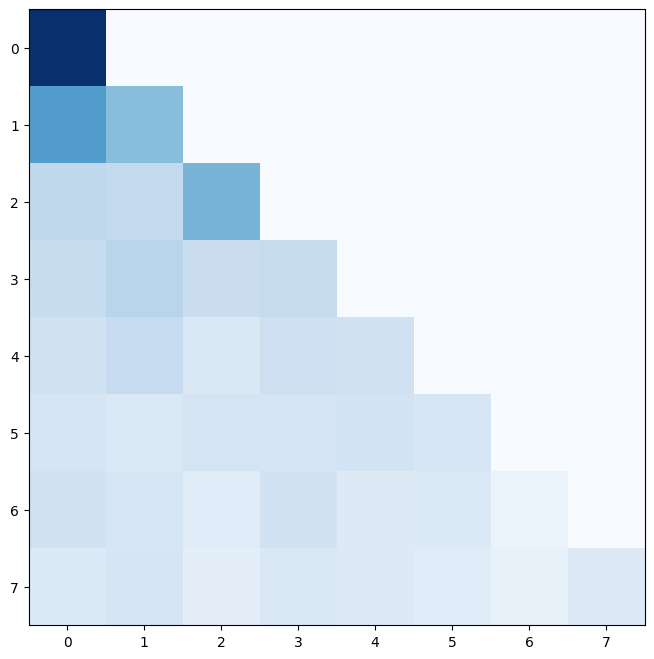

In [20]:
# Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(attention[1].detach().numpy(), cmap='Blues')

### Compute Attension


In [21]:
# Attension
out = attention @ V # dot product
out.shape

torch.Size([4, 8, 16])

In [22]:
out[1]

tensor([[ 0.7038, -0.2393,  0.1082,  0.0802,  0.1758, -0.3031, -0.2811, -0.0662,
         -0.0246, -1.1509, -0.3643,  0.8445,  0.1204, -0.0039, -0.5436,  0.0952],
        [ 0.6041,  0.0715,  0.0637,  0.0128,  0.1081, -0.4676, -0.3439, -0.1857,
          0.1801, -0.8234, -0.3639,  0.6568, -0.2618, -0.1186, -0.3658,  0.1868],
        [ 0.5963, -0.0171,  0.4070, -0.0533, -0.0668, -0.1588,  0.0097,  0.4589,
          0.2787,  0.4873, -0.3234,  0.4313,  0.0235, -0.1688, -0.0862, -0.0367],
        [ 0.6535,  0.0307,  0.3434,  0.2235, -0.3117, -0.2314, -0.1810,  0.0784,
          0.4105,  0.2049,  0.0404,  0.5428, -0.2559, -0.1660, -0.1689, -0.0897],
        [ 0.4461,  0.0357,  0.1528,  0.2125, -0.2955, -0.3859, -0.1908, -0.1349,
          0.2102, -0.0318,  0.0901,  0.5216, -0.3435, -0.1452, -0.2329, -0.1251],
        [ 0.3609, -0.1023,  0.1663,  0.2015, -0.2236, -0.1596,  0.0185, -0.0812,
          0.0763,  0.1161,  0.0850,  0.5569, -0.0988,  0.0185, -0.2997,  0.0143],
        [ 0.3860, -0.0

### Putting atttension all together

In [23]:
class SelfAttension(nn.Module):
  def __init__(self, head_size, vocab_size):
    super().__init__()

    self.head_size = head_size
    self.vocab_size = vocab_size
    self.C = 32

    # set seed
    torch.manual_seed(1337)


    self.embeddings_table = nn.Embedding(self.vocab_size, self.C)

    self.query = nn.Linear(C, self.head_size, bias=False)
    self.key = nn.Linear(C, self.head_size, bias=False)
    self.value = nn.Linear(C, self.head_size, bias=False)

  def forward(self, x):
    embed = self.embeddings_table(x)

    B,T,C = embed.shape

    # Find Q, K and V
    Q, K, V = self.query(embed), self.key(embed), self.value(embed)

    # Find score
    score = Q @ K.transpose(-2,-1)

    # Scale it
    k = self.head_size
    scaled_score = score / (k**0.5)

    # Masking
    tril = torch.tril(torch.ones(T, T))
    masked_scaled_score = scaled_score.masked_fill(tril == 0, float('-inf'))

    # Apply softmax
    softmax = nn.Softmax(dim=-1)
    attention = softmax(masked_scaled_score)

    # Attension
    out = attention @ V

    return out



In [24]:
# Example usage self attention
self_attention = SelfAttension(head_size=16, vocab_size=65)
out = self_attention.forward(x_batch)

print("Shape: ", out.shape)
print("Attesntion:\n", out[1])

Shape:  torch.Size([4, 8, 16])
Attesntion:
 tensor([[ 0.7038, -0.2393,  0.1082,  0.0802,  0.1758, -0.3031, -0.2811, -0.0662,
         -0.0246, -1.1509, -0.3643,  0.8445,  0.1204, -0.0039, -0.5436,  0.0952],
        [ 0.6041,  0.0715,  0.0637,  0.0128,  0.1081, -0.4676, -0.3439, -0.1857,
          0.1801, -0.8234, -0.3639,  0.6568, -0.2618, -0.1186, -0.3658,  0.1868],
        [ 0.5963, -0.0171,  0.4070, -0.0533, -0.0668, -0.1588,  0.0097,  0.4589,
          0.2787,  0.4873, -0.3234,  0.4313,  0.0235, -0.1688, -0.0862, -0.0367],
        [ 0.6535,  0.0307,  0.3434,  0.2235, -0.3117, -0.2314, -0.1810,  0.0784,
          0.4105,  0.2049,  0.0404,  0.5428, -0.2559, -0.1660, -0.1689, -0.0897],
        [ 0.4461,  0.0357,  0.1528,  0.2125, -0.2955, -0.3859, -0.1908, -0.1349,
          0.2102, -0.0318,  0.0901,  0.5216, -0.3435, -0.1452, -0.2329, -0.1251],
        [ 0.3609, -0.1023,  0.1663,  0.2015, -0.2236, -0.1596,  0.0185, -0.0812,
          0.0763,  0.1161,  0.0850,  0.5569, -0.0988,  0.018

In [25]:
# Multihead attention
class MultiHeadAttention(nn.Module):
  def __init__(self, num_heads, head_size, vocab_size):
    super().__init__()
    self.heads = nn.ModuleList([SelfAttension(head_size, vocab_size) for _ in range(num_heads)])
    self.proj = nn.Linear(head_size * num_heads, vocab_size)

  def forward(self, x):
    out = torch.cat([h(x) for h in self.heads], dim=-1)
    out = self.proj(out)
    return out



In [26]:
# USe multi head attention
multi_head_attention = MultiHeadAttention(num_heads=4, head_size=16, vocab_size=65)
out = multi_head_attention.forward(x_batch)

print("Shape: ", out.shape)

Shape:  torch.Size([4, 8, 65])


# ----------------- Model ------------------

## Simple Bigram Model

In [27]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()

    # Let say we have tokens and embed them
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    """Perform processing here.
    idx:- (B,T) tensor of integer.
    targets:- (B,T) tensor of integer.
    """


    logits = self.token_embedding_table(idx) # (B,T,C)

    return logits


m = BigramLanguageModel(vocab_size)
out = m(x_batch, y_batch)
print(out.shape)

torch.Size([4, 8, 65])


This is very simple model and we can easily find next charecter prediction as did in LexiGen in my previous project.
Now we need to define loss to check the quality.

In [28]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()

    # Let say we have tokens and embed them
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=0):
    """Perform processing here.
    idx:- (B,T) tensor of integer.
    targets:- (B,T) tensor of integer.
    """
    # Logits
    logits = self.token_embedding_table(idx) # (B,T,C)

    # Loss function
    # We using cross entropy loss and it accepts data in B,C,T shape thats why we need some minor changings.
    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return {
        'logits': logits.shape,
        'loss': loss
    }


m = BigramLanguageModel(vocab_size)
out = m(x_batch, y_batch)
print(out)

{'logits': torch.Size([32, 65]), 'loss': tensor(4.8786, grad_fn=<NllLossBackward0>)}


We have 65 possible vocab elements so:

-ln(1/65) = 4.1743

This is the loss we are axpecting, it means our models is guessing wrong.

Now, we are going to get some output from our mdoel to check how well it is prediction.

In [29]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()

    # Let say we have tokens and embed them
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    """Perform processing here.
    idx:- (B,T) tensor of integer.
    targets:- (B,T) tensor of integer.
    """
    # Logits
    logits = self.token_embedding_table(idx) # (B,T,C)

    # Loss function
    # We using cross entropy loss and it accepts data in B,C,T shape thats why we need some minor changings.
    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):

    for _ in range(max_new_tokens):
      # get predictions (logits)
      logits, loss = self(idx) # Calling forward function.

      logits = logits[:, -1, :] # (B,C)
      probs = F.softmax(logits, dim=-1) # (B,C)
      idx_next = torch.multinomial(probs, num_samples=1) # (B,1)
      idx = torch.cat((idx, idx_next), dim=1) # (B,T+1)

    return idx


m = BigramLanguageModel(vocab_size)
# idx is 0  and zero equals . which is our starting point of a word.
idx = torch.zeros((1,1), dtype=torch.long)
# Genrate new tokens which will be encoding and we shall decode them e.g 0 --> . 1 --> a etc.
print(decode(m.generate(idx, max_new_tokens=100)[0].tolist()))


Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


yeah! its working but...... Garbage.

## Training

Optimizer

In [30]:
optim = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [31]:
# Training loop
for steps in range(10000):

  # sample a btach
  xb, yb = get_batch('train')

  # evaluate loss
  logits, loss = m(xb, yb) # Forward is callable.
  optim.zero_grad(set_to_none=True)
  loss.backward()
  optim.step()

print(loss.item())

2.4212486743927


## Prediction

In [32]:
# idx is 0  and zero equals . which is our starting point of a word.
idx = torch.zeros((1,1), dtype=torch.long)
# Genrate new tokens which will be encoding and we shall decode them e.g 0 --> . 1 --> a etc.
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))


KIZ!

we?
W$d he k
MIV;


IETyoZY st:


Gheay Yatondgrende'TEQUNathinin: ans nd s

OREre.
Qhour im, sof bn I's temrpe thithattersuravWhefe h antr forgg m walos nt kit mo RLORZ'd IFknyor!
Sindis prewhous oodod.
wouprebe bll:CUNTHUSt

Thleaix;
Malesheais whe; lino.
ALI;
CXdaimboth,
batly, tyous w F nig har-
ASerin livin ad:
GRveitho wond ve ack'
3'd gat held inghe beromUCOFFoce ?Y's.
Pat fe, healcofoan.
FXgrnk3ffstoncetasollar dir ce s:

FGS OXELEurdo the horer mf IOP,-W?ENe,
LIDbor d,

CUSY: CKr t k the, averofithanontowbr boute, antorg ithe,
Dndill d,loworathalichothazLINothipr sowserll!-bee be y VObe, st,
U'l, ifrenit w fo-ber, OFo berad wit t w$itenepUING?cofe Win.
Cudsce kelind seail, is.
ARJathee p st; YNbs rld pr, auf tauth ny l bar:
cee hes ndetasuse

Ino'&ckinthe Wre tan; anu be, mZSEYQumbu wengboitor wismabe dat
IUN:
AUNoveed'stathemy;D:
wel batyamiPves;
LIthe hat b, ooly ingr w, th ar foumyo s ere fomswouf lSJu r f II ot wen rknge oorenn m ho w Sie l, amaveve a?Bu p nyoncllol

Loss decreased thats why getting something reasonable.

## Combining All

In [33]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 50000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

#  Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)


# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }


# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]


# Loading data
def get_batch(split):
  """Generate batch of data input x and target y."""
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x, y

# Loss estimating
@torch.no_grad()
def estimate_loss():
  out = {}
  m.eval()
  for split in ['train', 'val']:
    losses = torch.zeros(eval_interval)
    for k in range(eval_interval):
      X, Y = get_batch(split)
      logits, loss = m(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  m.train()
  return out


# Model
class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()

    # Let say we have tokens and embed them
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    """Perform processing here.
    idx:- (B,T) tensor of integer.
    targets:- (B,T) tensor of integer.
    """
    # Logits
    logits = self.token_embedding_table(idx) # (B,T,C)

    # Loss function
    # We using cross entropy loss and it accepts data in B,C,T shape thats why we need some minor changings.
    if targets is None:
      loss = None
    else:
      B, T, C = logits.shape
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):

    for _ in range(max_new_tokens):
      # get predictions (logits)
      logits, loss = self(idx) # Calling forward function.

      logits = logits[:, -1, :] # (B,C)
      probs = F.softmax(logits, dim=-1) # (B,C)
      idx_next = torch.multinomial(probs, num_samples=1) # (B,1)
      idx = torch.cat((idx, idx_next), dim=1) # (B,T+1)

    return idx


# Optimizer
optim = torch.optim.AdamW(m.parameters(), lr=1e-3)

# Training
m = BigramLanguageModel(vocab_size)
for steps in range(max_iters):

  # Estimate loss
  if steps % 10000 == 0:
    losses = estimate_loss()
    print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

  # sample a btach
  xb, yb = get_batch('train')
  logits, loss = m(xb, yb) # Forward is callable.
  optim.zero_grad(set_to_none=True)
  loss.backward()
  optim.step()


# Prediction
# idx is 0  and zero equals . which is our starting point of a word.
idx = torch.zeros((1,1), dtype=torch.long)
# Genrate new tokens which will be encoding and we shall decode them e.g 0 --> . 1 --> a etc.
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

step 0: train loss 4.7261, val loss 4.7230
step 10000: train loss 4.7266, val loss 4.7236
step 20000: train loss 4.7251, val loss 4.7239
step 30000: train loss 4.7274, val loss 4.7243
step 40000: train loss 4.7279, val loss 4.7260

p&ZAd jPylvV&bfFimy,iWZgF$-uxj,MJAU?zLjufB-tSBpG-jxhcLT?fxIb&yeathT:kpUNCJXlIoB'QCj$lSql
y,SA'YGGXlIkpupHhE$SlzaN:CF$zRJjsTsBTdF;QCH;AHfkyXN!aADEHEJWymnOjxltRT-ttr$AcMpdlS.Sq,ivkzbD.P -bLEjZJd,Sq-hylvSdzyA:xQhKB-woi?yhsSrU,v!Jd!:Ia!UNCttaQQEH,SGFjKh fRjQK&iM,phjd; kNWwW?pJreDCjgi?,iyO'RpADLUda!mDnk:C-wKH-Qg!m,VNpXEev'ymVOy ?wh$xtDHHxlzl-QTOqf$UAcL&dmFdmvqVbOcPLgmN'lgOXfu!ChOwrVI!JMe?ObhT;:wXIJd?nhEUEtd?.ev$kc;abRjmbXEnTQL-oTV;JtR:vWNw;YYhae?a!e'a- !dddYTEHA-olxa!zPpvbZ!oboRSNC vir,&X&Bju!Bdm.IKMC a-vvmmvyNA:CjFq,ShP'UsMm$wzT CgrKVrJFVw$ 
qgLTn!U?hJ!qzLs:3Qkzd?q?smpZTaHxJWWkz;.
X!za;voicotN bohK$!$G,OGj;ADMIHkO IB
ocLs$gCU'
&;AU!eZVbsA!Og$mZdLfl-KpgiWnxr&Q$UsBk!USV'a!FEPgCTHV?YZa!PgIQUqo?nOXLJiP'gCVz;lZItR:BHttoTaRjQJBoCXla
C f&ljyeArP!B3KSbfxIgZRvijmb
$-UzeG

## Adding previosuly created attesnion

In [46]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-3
n_embed = 32
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)  # Moved to device

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split)  # Already on device
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        out = attention @ V
        return out

# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.self_att_head = Head(n_embed)
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)  # Created on device
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        attn_out = self.self_att_head(x)
        logits = self.lm_head(attn_out)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device)  # Model moved to device
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')  # Already on device
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  # Created on device
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.1756, val loss 4.1771
step 10000: train loss 2.3003, val loss 2.3331
step 20000: train loss 2.2829, val loss 2.3240
step 30000: train loss 2.2726, val loss 2.3242
step 40000: train loss 2.2681, val loss 2.3201
step 50000: train loss 2.2649, val loss 2.3166
step 60000: train loss 2.2591, val loss 2.3147
step 70000: train loss 2.2591, val loss 2.3168
step 80000: train loss 2.2553, val loss 2.3166
step 90000: train loss 2.2547, val loss 2.3140
Final: step 99999: train loss 2.2529, val loss 2.3096

ANUnt iknod
Olowr,
This by bth
Yad the obe toe.
Sthand my dalilans bar bthar us hathe. Par dilas ate awice my.

HDY:
Yo Grem he owno, tof it hy me mil ndill, aes iree sen cie lat Het drovets, and Wil ngan ilerans!
elplind meal.
HAMET:
Schiry: tupr aiss hawty. Junto.
In Boupeen aves
Momy.
Whod mothake ont---ond do eiizes the my,
CHil The higend thoous
Al-
The
To kind thref If son; igr the:
Er Cip ale ont ffaf Pre?

WARKINUSHTING a!

WARDUKK:
Sadsad the Ere 

## Multi Head Attension

Until now we were adding single head attenstion, but now we shall add multi heads of attension.

In [50]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-3
n_embed = 32
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split) 
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        out = attention @ V
        return out

# MUlti Head attension
class MultiHeadAttension(nn.Module):
    """multiple heads of self attension."""

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])

    def forward(self, x):
        return torch.cat([h(x) for h in self.heads], dim=-1)
    

# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.self_att_head = MultiHeadAttension(4, n_embed//4) # Added attension here (number of heads = 4, attension head size = 8)
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        attn_out = self.self_att_head(x)
        logits = self.lm_head(attn_out)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device) 
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.1734, val loss 4.1755
step 10000: train loss 2.0850, val loss 2.1583
step 20000: train loss 2.0343, val loss 2.1411
step 30000: train loss 2.0114, val loss 2.1313
step 40000: train loss 2.0027, val loss 2.1234
step 50000: train loss 1.9941, val loss 2.1190
step 60000: train loss 1.9835, val loss 2.1077
step 70000: train loss 1.9791, val loss 2.1052
step 80000: train loss 1.9744, val loss 2.1075
step 90000: train loss 1.9697, val loss 2.1032
Final: step 99999: train loss 1.9655, val loss 2.0919

Will befork
Thowe, This by bloow: sere obe to: anthruand me?
I ands:
Whith fould worvet?
F AULADY, endway, my fef's a wizonour
You, froof is heirth it nown that miree sent, wilatisntiliove to and the nown is wans!

AUFIDIA:
Sher-hus, oncevey: thy havess, why mold nou normopetelives;
Promy wod mot ake oyou so what eight, the mosostill weeshime st so mowe fore
To king thrufirfor are
Tist my monge maled
And, af Pried my of.

HENRY BOLK:
Sby am
Sads.
We it gen

We have get some better answer.

## Feed forward network

In [2]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-3
n_embed = 32
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split) 
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        out = attention @ V
        return out

# MUlti Head attension
class MultiHeadAttension(nn.Module):
    """multiple heads of self attension."""

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])

    def forward(self, x):
        return torch.cat([h(x) for h in self.heads], dim=-1)


# FeedForward Network
class FeedForward(nn.Module):

    def __init__(self, n_embed):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(n_embed, n_embed),
            nn.ReLU(),
            nn.Linear(n_embed, n_embed)
            
        )

    def forward(self, x):
        return self.net(x)

    

# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.self_att_head = MultiHeadAttension(4, n_embed//4) 
        self.ffn = FeedForward(n_embed) # Feed forward network.
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        attn_out = self.self_att_head(x)
        ffn_attention_out = self.ffn(x) # Feed forward layer.
        logits = self.lm_head(ffn_attention_out)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device) 
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.2275, val loss 4.2292
step 10000: train loss 2.4600, val loss 2.4871
step 20000: train loss 2.4583, val loss 2.4908
step 30000: train loss 2.4567, val loss 2.4927
step 40000: train loss 2.4578, val loss 2.4873
step 50000: train loss 2.4577, val loss 2.4873
step 60000: train loss 2.4560, val loss 2.4903
step 70000: train loss 2.4580, val loss 2.4897
step 80000: train loss 2.4559, val loss 2.4901
step 90000: train loss 2.4557, val loss 2.4888
Final: step 99999: train loss 2.4567, val loss 2.4862



CExthy brid owindakis by ble

HAPen bube d e.
S:
O:
IS:
Falatanss:
Wanthar u qur, vet?
F dilasoate awice my.

Hastarom oroup
Yowhthatof is h ble mil ndill, ath iree senghin lat Heridrovets, and Win nghir.
Thanousel lind me l.
MAshe ce hiry:
Supr aisspllw y.
Herindu noroopetelaves
MP:

Pl, d mothakllo Windo whth eisbyo wie m dourive we hidend t so mower; te

AN ad nthrupt f s ar igr t m:

Thiny aleronth,
Mad
Whed my o myoff-
LIERor,

by ak
Sadsal this ghe

## Adding Block

In [7]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-3
n_embed = 32
n_head = 4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split) 
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        out = attention @ V
        return out

# MUlti Head attension
class MultiHeadAttension(nn.Module):
    """multiple heads of self attension."""

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])

    def forward(self, x):
        return torch.cat([h(x) for h in self.heads], dim=-1)


# FeedForward Network
class FeedForward(nn.Module):

    def __init__(self, n_embed):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(n_embed, n_embed),
            nn.ReLU()
            
        )

    def forward(self, x):
        return self.net(x)

    
class Block(nn.Module):
    """Transformer wrap block: communication followed by computation."""

    def __init__(self, n_embed, n_head):
        super().__init__()
        head_size = n_embed // n_head
        self.self_att_head = MultiHeadAttension(4, n_embed//4) 
        self.ffn = FeedForward(n_embed) # Feed forward network.

    def forward(self, x):
        x = self.self_att_head(x)
        x = self.ffn(x)
        return x
        
# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.block = nn.Sequential(
            Block(n_embed, n_head),
            Block(n_embed, n_head),
            Block(n_embed, n_head),
        )
        
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        x = self.block(x)
        logits = self.lm_head(x)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device) 
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.1952, val loss 4.1954
step 10000: train loss 2.1857, val loss 2.2270
step 20000: train loss 2.0760, val loss 2.1556
step 30000: train loss 2.0137, val loss 2.1195
step 40000: train loss 1.9777, val loss 2.0915
step 50000: train loss 1.9350, val loss 2.0602
step 60000: train loss 1.9069, val loss 2.0452
step 70000: train loss 1.8862, val loss 2.0501
step 80000: train loss 1.8677, val loss 2.0271
step 90000: train loss 1.8544, val loss 2.0227
Final: step 99999: train loss 1.8501, val loss 2.0225


Yre befork
Thow and is by be madient buay dandanth them me?
Leands:
Whither us hath but ceather ane awched you,
Than of onoughtow, fromf in heart mil;
I lit,
While eus, I in latient drov the do quin nown is wace!
Al lind me littius, on him so up;
Or spelw yem love us you peterat gonountly, demether
To Willond do eiighs to them, and Then him us poors
As for unte and thrupter so;
Angies muf's to male of, to fier of my of.

HENRLA:
Breight as
ardaal actious 

## Optimizations

### Residual connection 

In [10]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-3
n_embed = 32
n_head = 4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split) 
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        out = attention @ V
        return out

# MUlti Head attension
class MultiHeadAttension(nn.Module):
    """multiple heads of self attension."""

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.projection = nn.Linear(num_heads * head_size, n_embed) # For residual conn.

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.projection(out)
        return out


# FeedForward Network
class FeedForward(nn.Module):

    def __init__(self, n_embed):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(n_embed, 4*n_embed), # 4 times to complete 128 as described in paper.
            nn.ReLU(),
            nn.Linear(4*n_embed, n_embed),
            
        )

    def forward(self, x):
        return self.net(x)

    
class Block(nn.Module):
    """Transformer wrap block: communication followed by computation."""

    def __init__(self, n_embed, n_head):
        super().__init__()
        head_size = n_embed // n_head
        self.self_att_head = MultiHeadAttension(4, n_embed//4) 
        self.ffn = FeedForward(n_embed) # Feed forward network.

    def forward(self, x):
        x = x + self.self_att_head(x) # Added x for residual conn.
        x = x + self.ffn(x) # Added x for residual conn.
        return x
        
# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.block = nn.Sequential(
            Block(n_embed, n_head),
            Block(n_embed, n_head),
            Block(n_embed, n_head),
        )
        
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        x = self.block(x)
        logits = self.lm_head(x)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device) 
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.6987, val loss 4.7088
step 10000: train loss 1.6954, val loss 1.8743
step 20000: train loss 1.6297, val loss 1.8283
step 30000: train loss 1.6006, val loss 1.8045
step 40000: train loss 1.5874, val loss 1.7966
step 50000: train loss 1.5692, val loss 1.7839
step 60000: train loss 1.5642, val loss 1.7834
step 70000: train loss 1.5514, val loss 1.7950
step 80000: train loss 1.5475, val loss 1.7601
step 90000: train loss 1.5385, val loss 1.7708
Final: step 99999: train loss 1.5327, val loss 1.7631


KING RICHARD II:
Shall be be made to beauty enamage-dam the change:
Whither us hath bed redils
Hath away, my fears, to zost he own his fits her!
Alaw nowle, at misters, I in latest in oveys, and the next is wail!

AUFIDIUS:
The husbalt him speak; and the tyrantly,
He mayor this lown'd
the o' mother
To Willong do evil's worth dostical gentleman poor of his guard and thrupt for treaging me to thy fledgath,
Madam, death? I am I sup!

GREGORY:
Sads.
With Edwa

## Layer Normalization

Layer normalization normalizes the activations of a layer for each training example, so that they have mean 0 and variance 1.

In [13]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 32
batch_size = 64
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-3
n_embed = 32
n_head = 4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split) 
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        out = attention @ V
        return out

# MUlti Head attension
class MultiHeadAttension(nn.Module):
    """multiple heads of self attension."""

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.projection = nn.Linear(num_heads * head_size, n_embed) # For residual conn.

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.projection(out)
        return out


# FeedForward Network
class FeedForward(nn.Module):

    def __init__(self, n_embed):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(n_embed, 4*n_embed), # 4 times to complete 128 as described in paper.
            nn.ReLU(),
            nn.Linear(4*n_embed, n_embed),
            
        )

    def forward(self, x):
        return self.net(x)

    
class Block(nn.Module):
    """Transformer wrap block: communication followed by computation."""

    def __init__(self, n_embed, n_head):
        super().__init__()
        head_size = n_embed // n_head
        self.self_att_head = MultiHeadAttension(4, n_embed//4) 
        self.ffn = FeedForward(n_embed) # Feed forward network.
        self.ln1 = nn.LayerNorm(n_embed)
        self.ln2 = nn.LayerNorm(n_embed)
        

    def forward(self, x):
        x = x + self.self_att_head(self.ln1(x)) # Added x for residual conn.
        x = x + self.ffn(self.ln2(x)) # Added x for residual conn.
        return x
        
# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.block = nn.Sequential(
            Block(n_embed, n_head),
            Block(n_embed, n_head),
            Block(n_embed, n_head),
            nn.LayerNorm(n_embed)
        )
        
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        x = self.block(x)
        logits = self.lm_head(x)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device) 
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.4188, val loss 4.4242
step 10000: train loss 1.6934, val loss 1.8542
step 20000: train loss 1.6375, val loss 1.8262
step 30000: train loss 1.6075, val loss 1.7871
step 40000: train loss 1.5902, val loss 1.7902
step 50000: train loss 1.5752, val loss 1.7734
step 60000: train loss 1.5690, val loss 1.7710
step 70000: train loss 1.5594, val loss 1.7622
step 80000: train loss 1.5568, val loss 1.7500
step 90000: train loss 1.5447, val loss 1.7464
Final: step 99999: train loss 1.5357, val loss 1.7357


All thy bridl'd and is so blood: the bobbedon.
Stirtake me?
That shall this usque her backeth!
Hath away, my facts a rezans heavens, to that I could well
Who even well, I in latestly rove thee.

WARTIS:
Will justs liking tear.
Master now, you are aiss hew you love'd nor
To this destroy like to that
moal-now what evingle, and forth, Then, in he poor give; thereford none firs so;
And he must with allow; which Prind my offord's subjestice is:
Sadsal the Edwa

## Model Scaling

- Introduce layers of blocks
- Add dropout in FeedForward
- Add dropout in MultiHead
- Add dropout in Head
- Change batch size
- Change block size
- chenge embedding size
- Change number of heads

In [15]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed
torch.manual_seed(1337)

# Hyperparameters
block_size = 64
batch_size = 256
max_iters = 100_000
eval_interval = 1000
learning_rate = 1e-4
n_embed = 384
n_head = 6
n_layer = 6 # Number of block,
dropout = 0.2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Dataset
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Preprocess
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Encode Decode
string_to_int = { ch:i for i,ch in enumerate(chars) }
int_to_string = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

# Split data
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

# Loading data
def get_batch(split):
    """Generate batch of data input x and target y."""
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.to(device), y.to(device)

# Loss estimating
@torch.no_grad()
def estimate_loss():
    out = {}
    m.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_interval)
        for k in range(eval_interval):
            X, Y = get_batch(split) 
            logits, loss = m(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    m.train()
    return out

# Attention
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embed, head_size, bias=False)
        self.query = nn.Linear(n_embed, head_size, bias=False)
        self.value = nn.Linear(n_embed, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        Q, K, V = self.query(x), self.key(x), self.value(x)
        scaled_score = Q @ K.transpose(-2,-1) * (C**-0.5)
        masked_scaled_score = scaled_score.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        attention = F.softmax(masked_scaled_score, dim=-1)
        droped_attension = self.dropout(attention)
        out = droped_attension @ V
        return out

# MUlti Head attension
class MultiHeadAttension(nn.Module):
    """multiple heads of self attension."""

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.projection = nn.Linear(num_heads * head_size, n_embed) # For residual conn.
        self.dropout =nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.projection(out))
        return out


# FeedForward Network
class FeedForward(nn.Module):

    def __init__(self, n_embed):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(n_embed, 4*n_embed), # 4 times to complete 128 as described in paper.
            nn.ReLU(),
            nn.Linear(4*n_embed, n_embed),
            nn.Dropout(dropout)
            
        )

    def forward(self, x):
        return self.net(x)

    
class Block(nn.Module):
    """Transformer wrap block: communication followed by computation."""

    def __init__(self, n_embed, n_head):
        super().__init__()
        head_size = n_embed // n_head
        self.self_att_head = MultiHeadAttension(4, n_embed//4) 
        self.ffn = FeedForward(n_embed) # Feed forward network.
        self.ln1 = nn.LayerNorm(n_embed)
        self.ln2 = nn.LayerNorm(n_embed)
        

    def forward(self, x):
        x = x + self.self_att_head(self.ln1(x)) # Added x for residual conn.
        x = x + self.ffn(self.ln2(x)) # Added x for residual conn.
        return x
        
# Model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(block_size, n_embed)
        self.block = nn.Sequential(
            *[Block(n_embed, n_head=n_head) for _ in range(n_layer)]
        )

        self.layernorm = nn.LayerNorm(n_embed)
        
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        token_embed = self.token_embedding_table(idx)
        positions = torch.arange(T, device=device)
        position_embed = self.position_embedding_table(positions)
        x = token_embed + position_embed
        x = self.block(x)
        x = self.layernorm(x)
        logits = self.lm_head(x)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

# Initialize model and move to device
m = BigramLanguageModel(vocab_size).to(device) 
optim = torch.optim.AdamW(m.parameters(), lr=learning_rate)

# Training loop
for steps in range(max_iters):
    if steps % 10000 == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
    xb, yb = get_batch('train')
    logits, loss = m(xb, yb)
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()

# Final loss
losses = estimate_loss()
print(f"Final: step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

# Generation
idx = torch.zeros((1, 1), dtype=torch.long, device=device)  
print(decode(m.generate(idx, max_new_tokens=1000)[0].tolist()))

Using device: cuda
step 0: train loss 4.2752, val loss 4.2859
step 10000: train loss 1.1330, val loss 1.5142
step 20000: train loss 0.9079, val loss 1.6013
step 30000: train loss 0.7214, val loss 1.7495
step 40000: train loss 0.5761, val loss 1.9018
step 50000: train loss 0.4730, val loss 2.0438
step 60000: train loss 0.4023, val loss 2.1578
step 70000: train loss 0.3551, val loss 2.2541
step 80000: train loss 0.3206, val loss 2.3556
step 90000: train loss 0.2969, val loss 2.4451
Final: step 99999: train loss 0.2805, val loss 2.5099

O, give me worse, for time of bloody times!
All drophere should I raint my state friends,
I cratch'd the golden crown be mine;
With injuries thee can as this deep do it;
And say you will, sweat to my curse and swells
Upon what ever gave what men received
You shout a prince bow 'gainst Thursday me.
These have you done, and circly now,
What spares the switch is that when I seem she learn
The peace of this adversary.
How now, Catizen:
Do you think of her; ser

After **~10k** steps: Train loss continues to improve, but val loss starts getting worse the model is now starting to memorize the training data instead of generalizing which is **overfitting**. This took several hours in keggle P100 GPU to run thats why it would be hard to experiment and make it better.

But model scaling made the output significantly reasonable as compared to before scaling.